# MODELO CLASIFICACION REGRESION LOGISTICA

Presentamos e Importamos todas las librerias que vamos a necesitar a lo largo del modelo.

In [1]:
import pandas as pd
import numpy as np

#Librerias Visualizacion
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns 
from pylab import rcParams 

#Libreria Metricas
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#Librerias Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split 

# librerias Procesamieno Feature_engineering
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from imblearn.ensemble import BalancedBaggingClassifier 
from collections import Counter

# Libreria Dimensionalidad
from sklearn.decomposition import PCA


Leemos y presentamos nuestra Base de Datos. Mostramos las 5 primeras filas, el tipo y el nombre de las Columnas / variables que la componen. Las variables que se refierne a unidades de negocio no las vamos a utilizar en el modelo por lo que las transformamos a Objeto para un mejor entendimiento y segmentacion de las propias variables. La variable edad tambien es transformada a Int(64)

In [2]:
df = pd.read_csv('/home/dsc/Master-Kschool/TFM/Financial-Product-Sales-Forecast-Model/0rigin_data/cleanned_data/df.tfm')

In [3]:
df.head(5)

,cliente,saldo_captacion,esta_carterizado,cliente_bbp,tipo_gestor,gestor,cartera_patron,codigo_cartera,digital_3_meses,camino_digital,...,edad,seg_valor,seg_recorrido,dz,oficina,lp_seg_vida,lp_seg_acc,lp_seg_salud,lp_seg_hogar,lp_seg_auto
0,1,1328106.49,SI,NO,ASESOR FINANCIERO,18287.0,ASESORAMIENTO FINANCIERO,14881.0,SI,COMPRADOR,...,69.0,ALTO,BAJO RECORRIDO,2,210,0,0,0,1,0
1,2,1142234.34,SI,NO,ASESOR FINANCIERO,18287.0,ASESORAMIENTO FINANCIERO,14881.0,SI,COMPRADOR,...,81.0,ALTO,ALTO RECORRIDO,2,210,0,0,0,0,0
2,3,1142234.34,SI,NO,ASESOR FINANCIERO,18287.0,TUTELA,28332.0,NO,SIN USO,...,75.0,ALTO,BAJO RECORRIDO,2,210,0,0,0,0,0
3,4,1340503.88,SI,NO,ASESOR FINANCIERO,41475.0,ASESORAMIENTO FINANCIERO,14204.0,NO,SIN USO,...,94.0,ALTO,BAJO RECORRIDO,2,210,0,0,0,0,0
4,5,1758517.70,SI,NO,ASESOR FINANCIERO,39000.0,ASESORAMIENTO FINANCIERO,14219.0,SI,COMPRADOR,...,64.0,ALTO,BAJO RECORRIDO,2,210,0,0,0,0,0


In [4]:
df.columns

Index(['cliente', 'saldo_captacion', 'esta_carterizado', 'cliente_bbp',
       'tipo_gestor', 'gestor', 'cartera_patron', 'codigo_cartera',
       'digital_3_meses', 'camino_digital', 'saldo_financiacion', 'saldo_ffii',
       'saldo_plp', 'lp_dom_ingresos', 'lp_tjta_cto', 'lp_tjt_rev', 'lp_rbos',
       'lp_of_int', 'marca_bp', 'marca_ccte', 'edad', 'seg_valor',
       'seg_recorrido', 'dz', 'oficina', 'lp_seg_vida', 'lp_seg_acc',
       'lp_seg_salud', 'lp_seg_hogar', 'lp_seg_auto'],
      dtype='object')

In [5]:
df.dtypes

cliente                 int64
saldo_captacion       float64
esta_carterizado       object
cliente_bbp            object
tipo_gestor            object
gestor                float64
cartera_patron         object
codigo_cartera        float64
digital_3_meses        object
camino_digital         object
saldo_financiacion    float64
saldo_ffii            float64
saldo_plp             float64
lp_dom_ingresos         int64
lp_tjta_cto             int64
lp_tjt_rev              int64
lp_rbos                 int64
lp_of_int               int64
marca_bp               object
marca_ccte             object
edad                  float64
seg_valor              object
seg_recorrido          object
dz                      int64
oficina                 int64
lp_seg_vida             int64
lp_seg_acc              int64
lp_seg_salud            int64
lp_seg_hogar            int64
lp_seg_auto             int64
dtype: object

In [6]:
df[["cliente", "gestor",
    'codigo_cartera', 'dz', 'oficina']] = df[["cliente", "gestor",
                                              'codigo_cartera', 'dz', 'oficina']].astype(object);
#df['edad']=df['edad'].astype(int)

## LABEL ENCODER

Dentro del Data Frame existen 10 variables categoricas las cuales tenemos que transformar a numero para poder utilizarlas en el modelo.

In [7]:
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()

Transformamos las variables

In [8]:
lbl.fit_transform(df['tipo_gestor'])
lbl.fit_transform(df['esta_carterizado'])
lbl.fit_transform(df['cliente_bbp'])
lbl.fit_transform(df['cartera_patron'])
lbl.fit_transform(df['digital_3_meses'])
lbl.fit_transform(df['camino_digital'])
lbl.fit_transform(df['marca_bp'])
lbl.fit_transform(df['marca_ccte'])
lbl.fit_transform(df['seg_valor'])
lbl.fit_transform(df['seg_recorrido'])


array([1, 0, 1, ..., 3, 3, 0])

Asignamos a cada una de estas variables una nueva columna

In [9]:
df['tipo_gestor_etiqueta']=lbl.fit_transform(df['tipo_gestor'])
df['esta_carterizado_etiqueta']=lbl.fit_transform(df['esta_carterizado'])
df['cliente_bbp_etiqueta']=lbl.fit_transform(df['cliente_bbp'])
df['cartera_patron_etiqueta']=lbl.fit_transform(df['cartera_patron'])
df['digital_3_meses_etiqueta']=lbl.fit_transform(df['digital_3_meses'])
df['camino_digital_etiqueta']=lbl.fit_transform(df['camino_digital'])
df['marca_bp_etiqueta']=lbl.fit_transform(df['marca_bp'])
df['marca_ccte_etiqueta']=lbl.fit_transform(df['marca_ccte'])
df['seg_valor_etiqueta']=lbl.fit_transform(df['seg_valor'])
df['seg_recorrido_etiqueta']=lbl.fit_transform(df['seg_recorrido'])

Confirmamos que la transformacion se ha realizado correctamente. 

In [10]:
df['seg_recorrido_etiqueta'].value_counts()

0    163991
2    149923
1    127889
3      9571
Name: seg_recorrido_etiqueta, dtype: int64

Eliminamos las antiguas variables categoricas que se han transformado y lo confirmamos listando las columnas.

In [11]:
df.drop(['tipo_gestor','esta_carterizado','cliente_bbp','cartera_patron','digital_3_meses','camino_digital',
         'marca_bp','marca_ccte','seg_valor','seg_recorrido'],axis = 1,inplace = True)

In [12]:
df.columns

Index(['cliente', 'saldo_captacion', 'gestor', 'codigo_cartera',
       'saldo_financiacion', 'saldo_ffii', 'saldo_plp', 'lp_dom_ingresos',
       'lp_tjta_cto', 'lp_tjt_rev', 'lp_rbos', 'lp_of_int', 'edad', 'dz',
       'oficina', 'lp_seg_vida', 'lp_seg_acc', 'lp_seg_salud', 'lp_seg_hogar',
       'lp_seg_auto', 'tipo_gestor_etiqueta', 'esta_carterizado_etiqueta',
       'cliente_bbp_etiqueta', 'cartera_patron_etiqueta',
       'digital_3_meses_etiqueta', 'camino_digital_etiqueta',
       'marca_bp_etiqueta', 'marca_ccte_etiqueta', 'seg_valor_etiqueta',
       'seg_recorrido_etiqueta'],
      dtype='object')

# OUTLIERS

Hemos visto durante la exploracion del data set que existen distintas variables que son susceptibles de tener Outliers. Estas son 'edad','saldo_captacion','saldo_financiacion','saldo_ffii','saldo_plp'.  Trabajamos con ellas.  Lo primero que hacemos es analizarlas estadisticamente con Describe() y plotear un histograma de las mismas para verlas graficamente

In [13]:
posibles_variables_con_outliers = df[['edad','saldo_captacion','saldo_financiacion','saldo_ffii','saldo_plp']]

In [14]:
posibles_variables_con_outliers.describe()

,edad,saldo_captacion,saldo_financiacion,saldo_ffii,saldo_plp
count,451374.000000,4.513740e+05,4.513740e+05,4.513740e+05,451374.000000
mean,58.268941,4.971455e+04,1.380668e+04,8.483663e+03,1728.478326
std,19.018368,8.792364e+04,4.296438e+04,3.844671e+04,10780.622435
min,0.000000,-5.104332e+04,-4.900000e+03,0.000000e+00,0.000000
25%,45.000000,1.813182e+03,0.000000e+00,0.000000e+00,0.000000
50%,60.000000,1.520828e+04,0.000000e+00,0.000000e+00,0.000000
75%,73.000000,6.446964e+04,6.841775e+02,0.000000e+00,0.000000
max,118.000000,5.290216e+06,2.896317e+06,3.130940e+06,459937.460000


- Variable Fondos de Inversion. No contiene outliers. Son valores reales. La mayoria de los clientes no tienen saldos en Fondos de Inversion.
- Variable Planes de Pension.  No contiene outliers. Son valores reales. La mayoria de los clientes no tienen saldos en Planes de Pension.
- Variable Captacion. No tiene outliers. Son valores reales. Solamente modificamos los negativos y les damos valor de la media.
- Variable saldo Financiacion. No tiene outliers. Son valores reales.Solamente modificamos los negativos y les damos valor de la media.
- __Variable edad. Es la unica que puede tener ouliers reales.  Estudiamos y esos ouliers les asignaremos un nuevo valor.__

__Variable EDAD__

Hacemos una primera visualizacion con un histograma y un BoxPlot.  Estos arrojan informacion interesante como la distribucion normal y que el maximo de edad es de 118 años y que existen clientes con 0 años. Con este Boxplot vemos que los valores por debajo de 3/4 años y los valores por encima de los 114/115 años son outliers.  Estos valores los vamos a corregir dandoles valores minimos de 18 años y maximo de 100, adaptandolos a la realidad de mayoria de edad y de logica de estimacion de vida.

<AxesSubplot:>

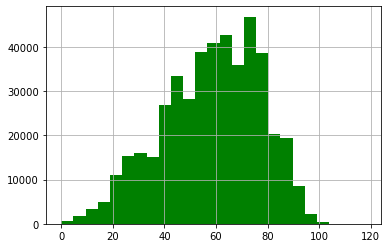

In [15]:
df['edad'].hist(color = 'g', bins = 25)

Boxplot edad


count    451374.000000
mean         58.268941
std          19.018368
min           0.000000
25%          45.000000
50%          60.000000
75%          73.000000
max         118.000000
Name: edad, dtype: float64

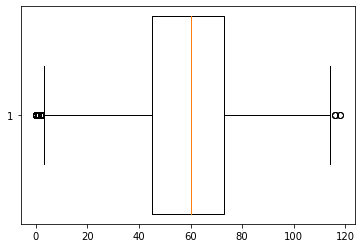

In [16]:
print ('Boxplot edad')
plt.boxplot(df['edad'],vert = False, widths = 2)
plt.show   
df['edad'].describe()

Para poder sacar los valores que son Outliers debemos sacar los rangos intercuartiles e identifcar los "bigotes"

In [17]:
# Cuartiles y rangos intercuartil
print ('Cuartiles edad')
print('='*30)
Q1 = df['edad'].quantile(0.25)
print ('Primer cuartil',Q1)
print('='*30)
Q3 = df['edad'].quantile(0.75)
print ('Tercer cuartil',Q3)
print('='*30)
rangointercuartil = (Q3 - Q1)
print ('Rango_intercuartil',rangointercuartil)
print('='*30)
mediana = df['edad'].median()
print ('Mediana', mediana)
print('='*30)
minimo = df['edad'].min()
print ('Minimo', minimo)
print('='*30)
maximo = df['edad'].max()
print ('Maximo', maximo)

Cuartiles edad
Primer cuartil 45.0
Tercer cuartil 73.0
Rango_intercuartil 28.0
Mediana 60.0
Minimo 0.0
Maximo 118.0


In [18]:
# Identifcamos los extremos superiores e inferiores de los bigotes
print('='*30)
extremo_inferior = Q1 - 1.5 * rangointercuartil
print ('Extremo bigote_inferior', extremo_inferior)
print('='*30)
extremo_superior = Q3 + 1.5 * rangointercuartil
print ('Extremo bigote_superior', extremo_superior)
print('='*30)

Extremo bigote_inferior 3.0
Extremo bigote_superior 115.0


In [19]:
# Detectamos y contamos los outliers
ubicacion_outliers = (df['edad'] < extremo_inferior) | (df['edad'] > extremo_superior)
outliers = df['edad'][ubicacion_outliers]
resto_datos_no_outliers = (df['edad'] >= extremo_inferior) & (df['edad'] <= extremo_superior)
no_outliers = df['edad'][resto_datos_no_outliers]
print('Outliers    :', outliers.count())
print('No Outliers :', no_outliers.count())


Outliers    : 254
No Outliers : 451120


In [20]:
# No queremos eliminar los outliers ya que son muy pocos vs todo el df. Los transformamos a la media de edad
df['edad'] = df['edad'].where(df['edad'] > 3 ,df['edad'].mean())
df['edad'] = df['edad'].where(df['edad'] < 115 ,df['edad'].mean())

Boxplot edad


count    451374.000000
mean         58.324076
std          18.934848
min           4.000000
25%          45.000000
50%          60.000000
75%          73.000000
max         114.000000
Name: edad, dtype: float64

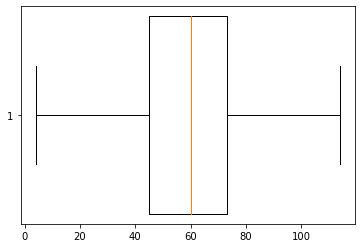

In [22]:
# Volvemos a hacer la  visualizacion
print ('Boxplot edad')
plt.boxplot(df['edad'],vert = False, widths = 2)
plt.show   
df['edad'].describe()

__Variable SALDO CAPTACION__

Sacamos un histograma y listamos un describe() para ver cual es su distribucion y sus principales estadisticas descirptivas. Esta variable esta conpuesta principalmente por clientes con bajos saldos de ahorro. En este caso todos los saldos son utiles, no existen outliers pero si saldos negativos que vamos a corregir para el modelo dandoles valores de 0 euros.

<AxesSubplot:>

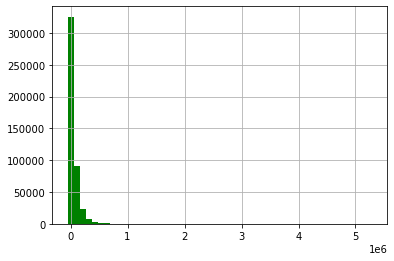

In [23]:
df['saldo_captacion'].hist(color = 'g', bins = 50)

In [24]:
df['saldo_captacion'].describe()

count    4.513740e+05
mean     4.971455e+04
std      8.792364e+04
min     -5.104332e+04
25%      1.813182e+03
50%      1.520828e+04
75%      6.446964e+04
max      5.290216e+06
Name: saldo_captacion, dtype: float64

In [25]:
# Hay 9440 clientes con saldo negativo . Solo el 2%
Clientes_con_saldos_negativos = df[df['saldo_captacion'] < 0]['cliente'].nunique()
Porcentaje_Clientes_con_saldos_negativos = df[df['saldo_captacion'] < 0]['cliente'].nunique() / df['cliente'].count()
print ('Clientes_con_saldos_negativos :',Clientes_con_saldos_negativos)
print ('Porcentaje_Clientes_con_saldos_negativos: ',Porcentaje_Clientes_con_saldos_negativos)

Clientes_con_saldos_negativos : 9440
Porcentaje_Clientes_con_saldos_negativos:  0.02091392060685817


In [26]:
# No queremos los valores negativos. Les damos valor de cero.
df[df['saldo_captacion'] < 0] = 0

In [27]:
# Sacamos nuvamente datos estadisticos..
df['saldo_captacion'].describe()

count    4.513740e+05
mean     4.971805e+04
std      8.792162e+04
min      0.000000e+00
25%      1.813182e+03
50%      1.520828e+04
75%      6.446964e+04
max      5.290216e+06
Name: saldo_captacion, dtype: float64

__Variable SALDO FINANCIACION__

Sacamos un histograma y listamos un describe() para ver cual es su distribucion y sus principales estadisticas descirptivas. Todos los datos de esta variable son datos validos ya que se trata de financiacion real de los clientes.  No existen outliers pero si existen clientes con financiacion negativa, esto es que son deudores.  Estos datos los vamos a transformar a valor 0€

<AxesSubplot:>

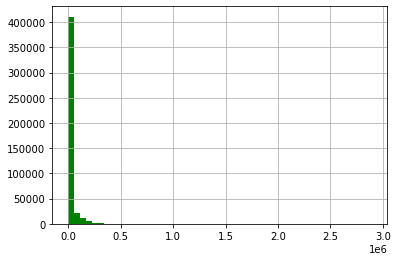

In [28]:
df['saldo_financiacion'].hist(color = 'g', bins = 50)

In [29]:
# No queremos los valores negativos. Les damos valor de media.
df['saldo_financiacion'].describe()

count    4.513740e+05
mean     1.353979e+04
std      4.262430e+04
min     -4.900000e+03
25%      0.000000e+00
50%      0.000000e+00
75%      6.066900e+02
max      2.896317e+06
Name: saldo_financiacion, dtype: float64

In [30]:
# Hay 9439 clientes con saldo negativo . 
Clientes_con_financiacion_negativa = df[df['saldo_financiacion'] < 0]['cliente'].nunique()
Porcentaje_Clientes_con_financiacion_negativad = df[df['saldo_financiacion'] < 0]['cliente'].nunique() / df['cliente'].count()
print ('Clientes_con_financiacion_negativa :',Clientes_con_financiacion_negativa)
print ('Porcentaje_Clientes_con_financiacion_negativa: ',Porcentaje_Clientes_con_financiacion_negativad)

Clientes_con_financiacion_negativa : 696
Porcentaje_Clientes_con_financiacion_negativa:  0.0015419585532175093


In [31]:
# No queremos los valores negativos. Les damos valor de cero.
df[df['saldo_financiacion'] < 0] = 0

In [32]:
df['saldo_financiacion'].describe()

count    4.513740e+05
mean     1.354013e+04
std      4.262418e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      6.066900e+02
max      2.896317e+06
Name: saldo_financiacion, dtype: float64

__Variable SALDO PLANES DE PENSION__

Sacamos un histograma y listamos un describe() para ver cual es su distribucion y sus principales estadisticas descriptivas. Se trata de una variable donde la mayoria de los clientes no tienen saldos en Planes de Pension.  Esta variable la mantenemos sin hacer ningun cambio. 

<AxesSubplot:>

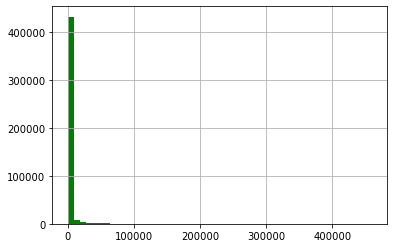

In [33]:
df['saldo_plp'].hist(color = 'g', bins = 50)

In [34]:
df['saldo_plp'].describe()

count    451374.000000
mean       1720.115913
std       10755.266998
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      459937.460000
Name: saldo_plp, dtype: float64

## __ADAPTAMOS EL DF SEGUN LAS VARIABLES QUE VAMOS A NECESITAR__



In [35]:
df.columns

Index(['cliente', 'saldo_captacion', 'gestor', 'codigo_cartera',
       'saldo_financiacion', 'saldo_ffii', 'saldo_plp', 'lp_dom_ingresos',
       'lp_tjta_cto', 'lp_tjt_rev', 'lp_rbos', 'lp_of_int', 'edad', 'dz',
       'oficina', 'lp_seg_vida', 'lp_seg_acc', 'lp_seg_salud', 'lp_seg_hogar',
       'lp_seg_auto', 'tipo_gestor_etiqueta', 'esta_carterizado_etiqueta',
       'cliente_bbp_etiqueta', 'cartera_patron_etiqueta',
       'digital_3_meses_etiqueta', 'camino_digital_etiqueta',
       'marca_bp_etiqueta', 'marca_ccte_etiqueta', 'seg_valor_etiqueta',
       'seg_recorrido_etiqueta'],
      dtype='object')

In [36]:
df = df[['edad','saldo_captacion','saldo_financiacion','saldo_ffii','saldo_plp',
              'lp_dom_ingresos','lp_tjta_cto','lp_tjt_rev','lp_rbos','lp_of_int',
              'lp_seg_vida','lp_seg_acc','lp_seg_salud','lp_seg_auto','lp_seg_hogar',
              'cartera_patron_etiqueta','digital_3_meses_etiqueta','camino_digital_etiqueta','marca_bp_etiqueta','marca_ccte_etiqueta',
              'seg_valor_etiqueta','seg_recorrido_etiqueta']]
               

## NORMALIZACION

Debemos llevar todas las varaibles a una escala comun. Para ello utilizamos MinMaxScaler.

In [37]:
from sklearn.preprocessing import MinMaxScaler

In [38]:
scaler = MinMaxScaler()

In [39]:
df_normalizado = scaler.fit_transform(df)

In [40]:
columnas_datos_numericos = df.columns

In [41]:
df_normalizado = pd.DataFrame(df_normalizado, columns=columnas_datos_numericos)

In [42]:
df_normalizado.head(3)

,edad,saldo_captacion,saldo_financiacion,saldo_ffii,saldo_plp,lp_dom_ingresos,lp_tjta_cto,lp_tjt_rev,lp_rbos,lp_of_int,...,lp_seg_salud,lp_seg_auto,lp_seg_hogar,cartera_patron_etiqueta,digital_3_meses_etiqueta,camino_digital_etiqueta,marca_bp_etiqueta,marca_ccte_etiqueta,seg_valor_etiqueta,seg_recorrido_etiqueta
0,0.605263,0.260598,0.0,0.45682,0.031101,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.00,0.0,0.0,0.0,0.333333
1,0.710526,0.224126,0.0,0.39064,0.000000,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.00,0.0,0.0,0.0,0.000000
2,0.657895,0.224126,0.0,0.39064,0.000000,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.75,0.0,1.0,0.0,0.333333


## PCA 

Despues de haber reducido el Data Frame quedandonos unicamente con las columnas necesarias para el estudio del modelo, aun asi tenemos 22 variables que vamos a intentar reducir utilizando PCA para reducir la dimensionalidad. Compararemos si la utilizacion del PCA mejora o no el resultado.


In [43]:
from sklearn.decomposition import PCA

In [44]:
df_sin_target = df_normalizado.drop(['lp_seg_hogar'], axis = 1)

In [45]:
#Instanciamos objeto PCA y aplicamos
pca = PCA(15) # n =  ponemos como numero de pcas 105
pca.fit(df_sin_target) # obtener los componentes principales
df_transforming = pca.transform(df_sin_target) # convertimos nuestros datos con las nuevas dimensiones de PCA

In [46]:
pca.components_[14]

array([ 0.77244536,  0.00479176, -0.00290637,  0.00288189,  0.00232971,
       -0.04517836, -0.00456588, -0.02945997, -0.19092502, -0.01071285,
        0.07993142,  0.58654283,  0.00441977,  0.02831311,  0.0100089 ,
        0.09663323, -0.00501407, -0.0496873 , -0.01132092,  0.01886127,
        0.01128446])

In [47]:
list(zip(df_sin_target.columns, df_transforming[0]))

[('edad', -1.0511399979794391),
 ('saldo_captacion', 0.22634828635250615),
 ('saldo_financiacion', 0.13529949656550322),
 ('saldo_ffii', 0.26729552368437637),
 ('saldo_plp', 0.5500890111912947),
 ('lp_dom_ingresos', -0.10174484196766423),
 ('lp_tjta_cto', 0.04416676752169877),
 ('lp_tjt_rev', 0.03753192984054866),
 ('lp_rbos', -0.3267201883219498),
 ('lp_of_int', 0.39885865448821883),
 ('lp_seg_vida', -0.2255396039263038),
 ('lp_seg_acc', 0.009661124957975737),
 ('lp_seg_salud', -0.30830506219935844),
 ('lp_seg_auto', -0.1276464835766206),
 ('cartera_patron_etiqueta', 0.05501816559491865)]

In [48]:
print("shape of X_pca", df_transforming.shape)
expl = pca.explained_variance_ratio_
print(expl)
print('suma:',sum(expl[0:15]))
#Vemos que con los 15 componentes tenemos el 99% de varianza explicada

shape of X_pca (451374, 15)
[0.26749326 0.14826234 0.11061553 0.09614101 0.06503345 0.05148205
 0.04344869 0.04085878 0.03830512 0.03312437 0.03086427 0.02656999
 0.02349518 0.00815522 0.00804602]
suma: 0.9918952831748846


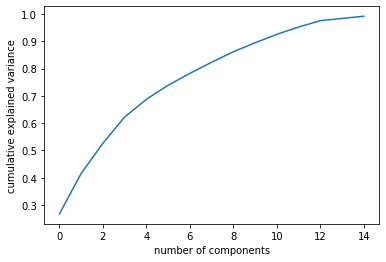

In [49]:
#graficamos el acumulado de varianza explicada en las nuevas dimensiones
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show() 

In [50]:
# Damos un nombre a cada columna del DF una vez realizado el PCA.
df_pca = pd.DataFrame (data = df_transforming, columns = ['1','2','3','4','5','6','7','8','9',
                                                          '10','11','12','13','14','15'
                                                          ])

In [51]:
# Unimos nuestro Target al DF con PCA realizado.
finalDf = pd.concat ([df_pca, df_normalizado [['lp_seg_hogar']]], axis = 1)

In [52]:
finalDf.columns

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', 'lp_seg_hogar'],
      dtype='object')

## MODELO

In [54]:
# finalDf = Modelo con PCA
# df_normalizado = Modelo sin PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [56]:
# Inputs y Target Sin PCA
X = df_normalizado.drop(['lp_seg_hogar'], axis = 1)
y= df_normalizado['lp_seg_hogar']
print('Datos X =', X.size, X.shape)
print('Datos y =', y.size, y.shape)

Datos X = 9478854 (451374, 21)
Datos y = 451374 (451374,)


In [57]:
# Inputs y Target Con PCA
X_pca = finalDf.drop(['lp_seg_hogar'], axis = 1)
y_pca = finalDf['lp_seg_hogar']
print('Datos X =', X_pca.size, X_pca.shape)
print('Datos y =', y_pca.size, y_pca.shape)

Datos X = 6770610 (451374, 15)
Datos y = 451374 (451374,)


## BALANCEO

Hemos visto en el estudio del Target que esta muy desbalanceado. Utilizaremos 3 distintas formulas para remediar este desbalanceo. Depues de entrenar las tres opciones Weigth balanced & Smote arrojan mejores resultados. NearMiss obtiene muy bajo resultado

- Penalización para compensar Weigth balanced
- NearMiss
- Smote

__1ª Estrategia: Penalización para compensar Weigth balanced__

In [58]:
# Solver elegido liblinear. 'newton-cg' no converge. 
clf_log_regressor = LogisticRegression(solver = 'liblinear', class_weight='balanced')
clf_log_regressor_pca = LogisticRegression(solver = 'liblinear', class_weight='balanced')

In [59]:
# Sin pca
clf_log_regressor.fit(X,y)

LogisticRegression(class_weight='balanced', solver='liblinear')

In [60]:
clf_log_regressor_pca.fit(X_pca,y_pca)

LogisticRegression(class_weight='balanced', solver='liblinear')

In [61]:
# Sin pca
clf_log_regressor.predict(X)

array([1., 1., 0., ..., 0., 0., 0.])

In [62]:
clf_log_regressor_pca.predict(X_pca)

array([1., 1., 0., ..., 0., 0., 0.])

In [63]:
# Sin pca
test_size = 0.2
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = seed)

In [64]:
# Con pca
test_size = 0.2
seed = 7
X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(X_pca, y_pca, test_size = test_size, random_state = seed)

In [65]:
# Sin pca
clf_log_regressor.fit(X_train,y_train)

LogisticRegression(class_weight='balanced', solver='liblinear')

In [66]:
# Con pca
clf_log_regressor_pca.fit(X_pca_train,y_pca_train)

LogisticRegression(class_weight='balanced', solver='liblinear')

In [67]:
# Sin pca
clf_log_regressor.predict(X_test)

array([1., 1., 1., ..., 1., 1., 0.])

In [68]:
# Con pca
clf_log_regressor_pca.predict(X_pca_test)

array([1., 1., 1., ..., 1., 1., 0.])

In [69]:
# Sin pca
clf_log_regressor.predict_proba(X_test)[:, 1]

array([0.59778442, 0.61215968, 0.7213536 , ..., 0.6709972 , 0.85741806,
       0.29143237])

In [70]:
# Con pca
clf_log_regressor_pca.predict_proba(X_pca_test)[:, 1]

array([0.74002932, 0.67216468, 0.76594521, ..., 0.70911023, 0.6913487 ,
       0.28201202])

[[52795 25802]
 [ 1326 10352]]


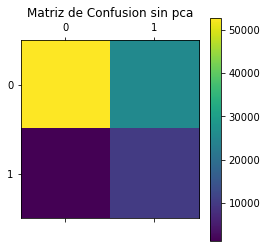

In [71]:
# Sin pca
matriz_confusion_clf_log_regressor = confusion_matrix(y_test,clf_log_regressor.predict(X_test))
print(matriz_confusion_clf_log_regressor)
pl.matshow(confusion_matrix(y_test,clf_log_regressor.predict(X_test)))
pl.title('Matriz de Confusion sin pca')
pl.colorbar()
pl.show()

[[51195 27402]
 [ 1206 10472]]


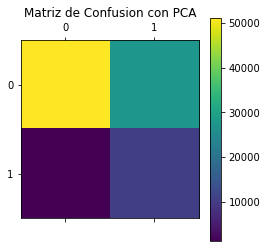

In [72]:
# Con pca
matriz_confusion_clf_log_regressor_pca = confusion_matrix(y_pca_test,clf_log_regressor_pca.predict(X_pca_test))
print(matriz_confusion_clf_log_regressor_pca)
pl.matshow(confusion_matrix(y_pca_test,clf_log_regressor_pca.predict(X_pca_test)))
pl.title('Matriz de Confusion con PCA')
pl.colorbar()
pl.show()

## Metrics: Cross validation

In [73]:
from sklearn.model_selection import cross_val_score
cross_val_score_precision = cross_val_score(clf_log_regressor,X,y,cv=5,scoring="precision").mean()
cross_val_score_precision_pca = cross_val_score(clf_log_regressor_pca,X_pca,y_pca,cv=5,scoring="precision").mean()
cross_val_score_recall = cross_val_score(clf_log_regressor,X,y,cv=5,scoring="recall").mean()
cross_val_score_recall_pca = cross_val_score(clf_log_regressor_pca,X_pca,y_pca,cv=5,scoring="recall").mean()
cross_val_score_f1 = cross_val_score(clf_log_regressor,X,y,cv=5,scoring="f1").mean()
cross_val_score_f1_pca = cross_val_score(clf_log_regressor_pca,X_pca,y_pca,cv=5,scoring="f1").mean()
print('Cross Validation sin pca: ', cross_val_score_precision , cross_val_score_recall, cross_val_score_f1)
print('Cross Validation con pca: ', cross_val_score_precision_pca , cross_val_score_recall_pca, cross_val_score_f1_pca)

Cross Validation sin pca:  0.28653385075187565 0.8874849991428082 0.43313146168063243
Cross Validation con pca:  0.27660320183064624 0.8951825818618208 0.4225511215081747


In [74]:
print('====================================')
print ('accuracy_score_sin_pca = ', accuracy_score(y_test,clf_log_regressor.predict(X_test)))
print ('accuracy_score_con_pca = ', accuracy_score(y_pca_test,clf_log_regressor_pca.predict(X_pca_test)))
print('====================================')
print('precision_sin_pca  =', precision_score(y_test,clf_log_regressor.predict(X_test)))
print('precision_covalidationnn_pca  =', precision_score(y_pca_test,clf_log_regressor_pca.predict(X_pca_test)))
print('====================================')
print('recall_sin_pca  =', recall_score(y_test,clf_log_regressor.predict(X_test)))
print('recall_con_pca  =', recall_score(y_pca_test,clf_log_regressor_pca.predict(X_pca_test)))
print('====================================')
print('f1_score_sin_pca  =', f1_score(y_test,clf_log_regressor.predict(X_test)))
print('f1_score_con_pca  =', f1_score(y_pca_test,clf_log_regressor_pca.predict(X_pca_test)))
print('====================================')
print('roc_auc_score_sin_pca  =', roc_auc_score(y_test,clf_log_regressor.predict_proba(X_test)[:, 1]))
print('roc_auc_score_con_pca  =', roc_auc_score(y_pca_test,clf_log_regressor_pca.predict_proba(X_pca_test)[:, 1]))
print('====================================')
print('classification_report_sin_pca ')
print(classification_report(y_test, clf_log_regressor.predict(X_test)))
print('classification_report_con_pca ')
print(classification_report(y_pca_test, clf_log_regressor_pca.predict(X_pca_test)))

accuracy_score_sin_pca =  0.6994959844918305
accuracy_score_con_pca =  0.6831016338964275
precision_sin_pca  = 0.28633069646512144
precision_con_pca  = 0.27649574906268154
recall_sin_pca  = 0.8864531597876348
recall_con_pca  = 0.8967288919335503
f1_score_sin_pca  = 0.4328483023917044
f1_score_con_pca  = 0.42266709719082984
roc_auc_score_sin_pca  = 0.8432042268174845
roc_auc_score_con_pca  = 0.828035322817812
classification_report_sin_pca 
              precision    recall  f1-score   support

         0.0       0.98      0.67      0.80     78597
         1.0       0.29      0.89      0.43     11678

    accuracy                           0.70     90275
   macro avg       0.63      0.78      0.61     90275
weighted avg       0.89      0.70      0.75     90275

classification_report_con_pca 
              precision    recall  f1-score   support

         0.0       0.98      0.65      0.78     78597
         1.0       0.28      0.90      0.42     11678

    accuracy                       

0.8432042268174845

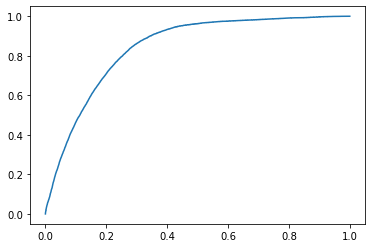

In [75]:
# Pintamos la Curva Roc SIN PCA que ha dado mejor resultado
tpr, fpr, thresolds = roc_curve(y_test, clf_log_regressor.predict_proba(X_test)[:, 1])
plt.plot(tpr, fpr)
roc_auc_score(y_test,clf_log_regressor.predict_proba(X_test)[:, 1])

### 2ª Estrategia: Subsampling en la clase mayoritaria 
    - Con NearMiss
    
https://www.geeksforgeeks.org/ml-handling-imbalanced-data-with-smote-and-near-miss-algorithm-in-python/

In [76]:
clf_log_regressor = LogisticRegression(solver = 'liblinear')

In [77]:
clf_log_regressor.fit(X,y)

LogisticRegression(solver='liblinear')

In [78]:
clf_log_regressor.predict(X)

array([0., 0., 0., ..., 0., 0., 0.])

In [79]:
# Balanceamos con NearMiss "
from imblearn.under_sampling import NearMiss
nr = NearMiss() 

In [80]:
# Sin pca
X_train_miss, y_train_miss = nr.fit_sample(X_train, y_train)  

In [81]:
# Con pca
X_train_miss_pca, y_train_miss_pca = nr.fit_sample(X_pca_train, y_pca_train)  

In [88]:
print ("Distribucion antes de NearMiss_sin_pca : {} ".format(Counter(y_train)))
print ("Distribucion antes de NearMiss_con_pca : {} ".format(Counter(y_pca_train)))
print('====================================')
print ("Distribucion despues de NearMiss_sin_pca : {} ".format(Counter(y_train_miss)))
print ("Distribucion despues de NearMiss_con_pca : {} ".format(Counter(y_train_miss_pca)))

Distribucion antes de NearMiss_sin_pca : Counter({0.0: 314447, 1.0: 46652}) 
Distribucion antes de NearMiss_con_pca : Counter({0.0: 314447, 1.0: 46652}) 
Distribucion despues de NearMiss_sin_pca : Counter({0.0: 46652, 1.0: 46652}) 
Distribucion despues de NearMiss_con_pca : Counter({0.0: 46652, 1.0: 46652}) 


In [89]:
# Sin pca
clf_log_regressor.fit(X_train_miss, y_train_miss) 

LogisticRegression(solver='liblinear')

In [90]:
# Con pca
clf_log_regressor_pca.fit(X_train_miss_pca, y_train_miss_pca) 

LogisticRegression(class_weight='balanced', solver='liblinear')

In [92]:
# Sin pca
clf_log_regressor.predict(X_test)

array([1., 1., 1., ..., 0., 1., 0.])

In [94]:
# Con pca
clf_log_regressor_pca.predict(X_pca_test)

array([1., 1., 1., ..., 0., 0., 1.])

In [96]:
# Sin pca
clf_log_regressor.predict_proba(X_test)[:, 1]

array([0.65841118, 0.63083343, 0.95536121, ..., 0.37046827, 0.93395562,
       0.38124456])

In [97]:
# Con pca
clf_log_regressor_pca.predict_proba(X_pca_test)[:, 1]

array([0.75529495, 0.70554246, 0.98879324, ..., 0.36412676, 0.39172267,
       0.66073105])

In [99]:
print('=== RESULTADOS CON NEARMISS ========')
print ('accuracy_score_sin_pca = ', accuracy_score(y_test,clf_log_regressor.predict(X_test)))
print ('accuracy_score_con_pca = ', accuracy_score(y_pca_test,clf_log_regressor_pca.predict(X_pca_test)))
print('====================================')
print('precision_sin_pca  =', precision_score(y_test,clf_log_regressor.predict(X_test)))
print('precision_covalidationnn_pca  =', precision_score(y_pca_test,clf_log_regressor_pca.predict(X_pca_test)))
print('====================================')
print('recall_sin_pca  =', recall_score(y_test,clf_log_regressor.predict(X_test)))
print('recall_con_pca  =', recall_score(y_pca_test,clf_log_regressor_pca.predict(X_pca_test)))
print('====================================')
print('f1_score_sin_pca  =', f1_score(y_test,clf_log_regressor.predict(X_test)))
print('f1_score_con_pca  =', f1_score(y_pca_test,clf_log_regressor_pca.predict(X_pca_test)))
print('====================================')
print('roc_auc_score_sin_pca  =', roc_auc_score(y_test,clf_log_regressor.predict_proba(X_test)[:, 1]))
print('roc_auc_score_con_pca  =', roc_auc_score(y_pca_test,clf_log_regressor_pca.predict_proba(X_pca_test)[:, 1]))
print('====================================')
print('classification_report_sin_pca ')
print(classification_report(y_test, clf_log_regressor.predict(X_test)))
print('classification_report_con_pca ')
print(classification_report(y_pca_test, clf_log_regressor_pca.predict(X_pca_test)))

=== RESULTADOS CON NEARMISS ========
accuracy_score_sin_pca =  0.5620382165605096
accuracy_score_con_pca =  0.47042924397673774
precision_sin_pca  = 0.1755979412655162
precision_covalidationnn_pca  = 0.14112879194230885
recall_sin_pca  = 0.6456585031683507
recall_con_pca  = 0.6083233430381915
f1_score_sin_pca  = 0.27610450958492777
f1_score_con_pca  = 0.22910586148512457
roc_auc_score_sin_pca  = 0.6206506671332498
roc_auc_score_con_pca  = 0.5130020041732788
classification_report_sin_pca 
              precision    recall  f1-score   support

         0.0       0.91      0.55      0.69     78597
         1.0       0.18      0.65      0.28     11678

    accuracy                           0.56     90275
   macro avg       0.54      0.60      0.48     90275
weighted avg       0.82      0.56      0.63     90275

classification_report_con_pca 
              precision    recall  f1-score   support

         0.0       0.89      0.45      0.60     78597
         1.0       0.14      0.61      0

### 2ª Estrategia: Subsampling en la clase mayoritaria 
      - Con Smote

In [100]:
# Balanceamos con Smote """ no mejoramos"""
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 

In [ ]:
#clf_log_regressor = LogisticRegression(solver = 'liblinear')

In [ ]:
#clf_log_regressor.fit(X,y)

In [ ]:
#clf_log_regressor.predict(X)

In [101]:
# Sin pca
X_train_smote, y_train_smote = sm.fit_sample(X_train, y_train) 

In [105]:
# Con pca
X_train_smote_pca, y_train_smote_pca = nr.fit_sample(X_pca_train, y_pca_train)  

In [106]:
print ("Distribucion antes de NearMiss_sin_pca : {} ".format(Counter(y_train)))
print ("Distribucion antes de NearMiss_con_pca : {} ".format(Counter(y_pca_train)))
print('====================================')
print ("Distribucion despues de NearMiss_sin_pca : {} ".format(Counter(y_train_smote)))
print ("Distribucion despues de NearMiss_con_pca : {} ".format(Counter(y_train_smote_pca)))

Distribucion antes de NearMiss_sin_pca : Counter({0.0: 314447, 1.0: 46652}) 
Distribucion antes de NearMiss_con_pca : Counter({0.0: 314447, 1.0: 46652}) 
Distribucion despues de NearMiss_sin_pca : Counter({0.0: 314447, 1.0: 314447}) 
Distribucion despues de NearMiss_con_pca : Counter({0.0: 46652, 1.0: 46652}) 


In [107]:
# Sin pca
clf_log_regressor.fit(X_train_smote, y_train_smote) 

LogisticRegression(solver='liblinear')

In [108]:
# Con pca
clf_log_regressor_pca.fit(X_train_smote_pca, y_train_smote_pca) 

LogisticRegression(class_weight='balanced', solver='liblinear')

In [109]:
# Sin pca
clf_log_regressor.predict(X_test)

array([1., 1., 1., ..., 1., 1., 0.])

In [110]:
# Con pca
clf_log_regressor_pca.predict(X_pca_test)

array([1., 1., 1., ..., 0., 0., 1.])

In [111]:
# Sin pca
clf_log_regressor.predict_proba(X_test)[:, 1]

array([0.58453036, 0.617949  , 0.71656121, ..., 0.67559252, 0.84884824,
       0.30334895])

In [112]:
# Con pca
clf_log_regressor_pca.predict_proba(X_pca_test)[:, 1]

array([0.75529495, 0.70554246, 0.98879324, ..., 0.36412676, 0.39172267,
       0.66073105])

In [113]:
print('=== RESULTADOS CON SMOTE ========')
print ('accuracy_score_sin_pca = ', accuracy_score(y_test,clf_log_regressor.predict(X_test)))
print ('accuracy_score_con_pca = ', accuracy_score(y_pca_test,clf_log_regressor_pca.predict(X_pca_test)))
print('====================================')
print('precision_sin_pca  =', precision_score(y_test,clf_log_regressor.predict(X_test)))
print('precision_covalidationnn_pca  =', precision_score(y_pca_test,clf_log_regressor_pca.predict(X_pca_test)))
print('====================================')
print('recall_sin_pca  =', recall_score(y_test,clf_log_regressor.predict(X_test)))
print('recall_con_pca  =', recall_score(y_pca_test,clf_log_regressor_pca.predict(X_pca_test)))
print('====================================')
print('f1_score_sin_pca  =', f1_score(y_test,clf_log_regressor.predict(X_test)))
print('f1_score_con_pca  =', f1_score(y_pca_test,clf_log_regressor_pca.predict(X_pca_test)))
print('====================================')
print('roc_auc_score_sin_pca  =', roc_auc_score(y_test,clf_log_regressor.predict_proba(X_test)[:, 1]))
print('roc_auc_score_con_pca  =', roc_auc_score(y_pca_test,clf_log_regressor_pca.predict_proba(X_pca_test)[:, 1]))
print('====================================')
print('classification_report_sin_pca ')
print(classification_report(y_test, clf_log_regressor.predict(X_test)))
print('classification_report_con_pca ')
print(classification_report(y_pca_test, clf_log_regressor_pca.predict(X_pca_test)))


=== RESULTADOS CON SMOTE ========
accuracy_score_sin_pca =  0.6996178343949044
accuracy_score_con_pca =  0.47042924397673774
precision_sin_pca  = 0.28621673267052533
precision_covalidationnn_pca  = 0.14112879194230885
recall_sin_pca  = 0.8849974310669635
recall_con_pca  = 0.6083233430381915
f1_score_sin_pca  = 0.43254441584531356
f1_score_con_pca  = 0.22910586148512457
roc_auc_score_sin_pca  = 0.843483230348852
roc_auc_score_con_pca  = 0.5130020041732788
classification_report_sin_pca 
              precision    recall  f1-score   support

         0.0       0.98      0.67      0.80     78597
         1.0       0.29      0.88      0.43     11678

    accuracy                           0.70     90275
   macro avg       0.63      0.78      0.61     90275
weighted avg       0.89      0.70      0.75     90275

classification_report_con_pca 
              precision    recall  f1-score   support

         0.0       0.89      0.45      0.60     78597
         1.0       0.14      0.61      0.23